## Exercício 2

Neste exercício, você irá comparar o desempenho de dois algoritmos de busca: a busca linear e a busca binária. Embora ambos resolvam o mesmo problema, eles apresentam tempos de execução muito diferentes para grandes volumes de dados.
O uso da linguagem Python é obrigatório, assim como o uso do módulo `time`.

### Diagrama de Fluxo Geral dos Algoritmos

In [9]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A[Início] --> B[Lista Ordenada + Elemento Alvo]
    B --> C{Escolher Algoritmo}
    
    %% Linear Search Branch
    C -->|Busca Linear| D[Verificar elemento atual]
    D --> F{Elemento encontrado?}
    F -->|Sim| H[Retornar índice]
    F -->|Não| I{Fim da lista?}
    I -->|Não| D2[Próximo elemento]
    D2 --> D
    I -->|Sim| L[Retornar -1]
    
    %% Binary Search Branch
    C -->|Busca Binária| E[Calcular meio da lista]
    E --> G{Elemento = meio?}
    G -->|Sim| H
    G -->|Elemento < meio| J[Lista = metade esquerda]
    G -->|Elemento > meio| K[Lista = metade direita]
    J --> E2[Calcular novo meio]
    K --> E2
    E2 --> G2{Lista vazia?}
    G2 -->|Não| G
    G2 -->|Sim| L
    
    %% End states
    H --> M[Fim]
    L --> M
    
    %% Styling
    classDef startEnd fill:#e1f5fe
    classDef decision fill:#fff3e0
    classDef process fill:#f3e5f5
    classDef result fill:#e8f5e8
    
    class A,M startEnd
    class C,F,I,G,G2 decision
    class B,D,D2,E,J,K,E2 process
    class H,L result
"""
mm(diagrama)

a) Implementação de algoritmos de busca

Implemente duas funções em Python que recebem uma lista ordenada e um número-alvo como entrada, e retornam o índice do número caso ele exista:

1. Busca linear: verifica elemento por elemento, da esquerda para a direita.

2. Busca binária: divide a lista ao meio a cada passo, descartando metade dos elementos.

In [10]:
def busca_linear(lista, alvo):
    """
    Implementa busca linear - verifica cada elemento sequencialmente.
    """
    for i in range(len(lista)):
        if lista[i] == alvo:
            return i
    return -1

def busca_binaria(lista, alvo):
    """
    Implementa busca binária - divide a lista pela metade a cada iteração.
    """
    esquerda = 0
    direita = len(lista) - 1
    
    while esquerda <= direita:
        meio = (esquerda + direita) // 2
        
        if lista[meio] == alvo:
            return meio
        elif lista[meio] < alvo:
            esquerda = meio + 1
        else:
            direita = meio - 1
    
    return -1

# Testando as implementações
lista_teste = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
alvo_teste = 7

print(f"Lista de teste: {lista_teste}")
print(f"Buscando por: {alvo_teste}")
print(f"Busca linear: índice {busca_linear(lista_teste, alvo_teste)}")
print(f"Busca binária: índice {busca_binaria(lista_teste, alvo_teste)}")

# Testando elemento que não existe
alvo_inexistente = 8
print(f"\nBuscando por elemento inexistente ({alvo_inexistente}):")
print(f"Busca linear: {busca_linear(lista_teste, alvo_inexistente)}")
print(f"Busca binária: {busca_binaria(lista_teste, alvo_inexistente)}")

Lista de teste: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Buscando por: 7
Busca linear: índice 3
Busca binária: índice 3

Buscando por elemento inexistente (8):
Busca linear: -1
Busca binária: -1


b) Medindo o tempo de execução

Crie listas com tamanhos $N=10^4$,$10^5$,$10^6$,$10^7$. com números de $1$ a $N$, e busque por:

- Um elemento no início
- Um elemento no meio
- Um elemento no fim
- Um elemento que não está na lista

Meça os tempos de execução para cada busca em cada cenário. Use `time.time()` para medir os tempos.

In [12]:
import timeit # A resolução da função time() é limitada a microsegundos, o que é insuficiente para operações muito rápidas, como a busca binária.

def medir_tempo_busca(funcao_busca, lista, alvo, repeticoes=100):
    """
    Mede o tempo médio usando timeit para maior precisão.
    """
    def teste():
        funcao_busca(lista, alvo)
    
    tempo_total = timeit.timeit(teste, number=repeticoes)
    return tempo_total / repeticoes

# Tamanhos das listas para teste
tamanhos = [10**4, 10**5, 10**6, 10**7]

# Dicionários para armazenar os resultados
resultados_linear = {'inicio': [], 'meio': [], 'fim': [], 'nao_encontrado': []}
resultados_binario = {'inicio': [], 'meio': [], 'fim': [], 'nao_encontrado': []}

print("Iniciando medições de tempo...\n")

for n in tamanhos:
    print(f"Testando com lista de tamanho {n:,}")
    
    # Criar lista ordenada de 1 a n
    lista = list(range(1, n + 1))
    
    # Definir elementos a buscar
    inicio = 1          # Primeiro elemento
    meio = n // 2       # Elemento no meio
    fim = n             # Último elemento
    nao_existe = n + 1  # Elemento que não existe
    
    # Medir tempos para busca linear
    tempo_linear_inicio = medir_tempo_busca(busca_linear, lista, inicio)
    tempo_linear_meio = medir_tempo_busca(busca_linear, lista, meio)
    tempo_linear_fim = medir_tempo_busca(busca_linear, lista, fim)
    tempo_linear_nao = medir_tempo_busca(busca_linear, lista, nao_existe)
    
    # Medir tempos para busca binária
    tempo_binario_inicio = medir_tempo_busca(busca_binaria, lista, inicio)
    tempo_binario_meio = medir_tempo_busca(busca_binaria, lista, meio)
    tempo_binario_fim = medir_tempo_busca(busca_binaria, lista, fim)
    tempo_binario_nao = medir_tempo_busca(busca_binaria, lista, nao_existe)
    
    # Armazenar resultados
    resultados_linear['inicio'].append(tempo_linear_inicio)
    resultados_linear['meio'].append(tempo_linear_meio)
    resultados_linear['fim'].append(tempo_linear_fim)
    resultados_linear['nao_encontrado'].append(tempo_linear_nao)
    
    resultados_binario['inicio'].append(tempo_binario_inicio)
    resultados_binario['meio'].append(tempo_binario_meio)
    resultados_binario['fim'].append(tempo_binario_fim)
    resultados_binario['nao_encontrado'].append(tempo_binario_nao)
    
    print(f"  Busca Linear - Início: {tempo_linear_inicio:.10f}s, Meio: {tempo_linear_meio:.10f}s, Fim: {tempo_linear_fim:.10f}s, Não encontrado: {tempo_linear_nao:.10f}s")
    print(f"  Busca Binária - Início: {tempo_binario_inicio:.10f}s, Meio: {tempo_binario_meio:.10f}s, Fim: {tempo_binario_fim:.10f}s, Não encontrado: {tempo_binario_nao:.10f}s")
    print()

Iniciando medições de tempo...

Testando com lista de tamanho 10,000
  Busca Linear - Início: 0.0000003860s, Meio: 0.0002650760s, Fim: 0.0005605770s, Não encontrado: 0.0005019800s
  Busca Binária - Início: 0.0000018370s, Meio: 0.0000003330s, Fim: 0.0000024390s, Não encontrado: 0.0000026930s

Testando com lista de tamanho 100,000
  Busca Linear - Início: 0.0000003730s, Meio: 0.0024782250s, Fim: 0.0048793390s, Não encontrado: 0.0051649070s
  Busca Binária - Início: 0.0000023210s, Meio: 0.0000003000s, Fim: 0.0000028120s, Não encontrado: 0.0000031550s

Testando com lista de tamanho 1,000,000
  Busca Linear - Início: 0.0000003570s, Meio: 0.0248489860s, Fim: 0.0507446970s, Não encontrado: 0.0509136540s
  Busca Binária - Início: 0.0000027590s, Meio: 0.0000002990s, Fim: 0.0000034540s, Não encontrado: 0.0000034230s

Testando com lista de tamanho 10,000,000
  Busca Linear - Início: 0.0000003430s, Meio: 0.2462653060s, Fim: 0.4947738890s, Não encontrado: 0.5111291810s
  Busca Binária - Início: 0.0

c) Comparando os tempos

Crie gráficos com `matplotlib` que mostrem:

- Tempo de execução (em escala log-log) versus o tamanho da lista para ambos os algoritmos.
- Uma curva para cada caso de posição (início, meio, fim, não encontrado).

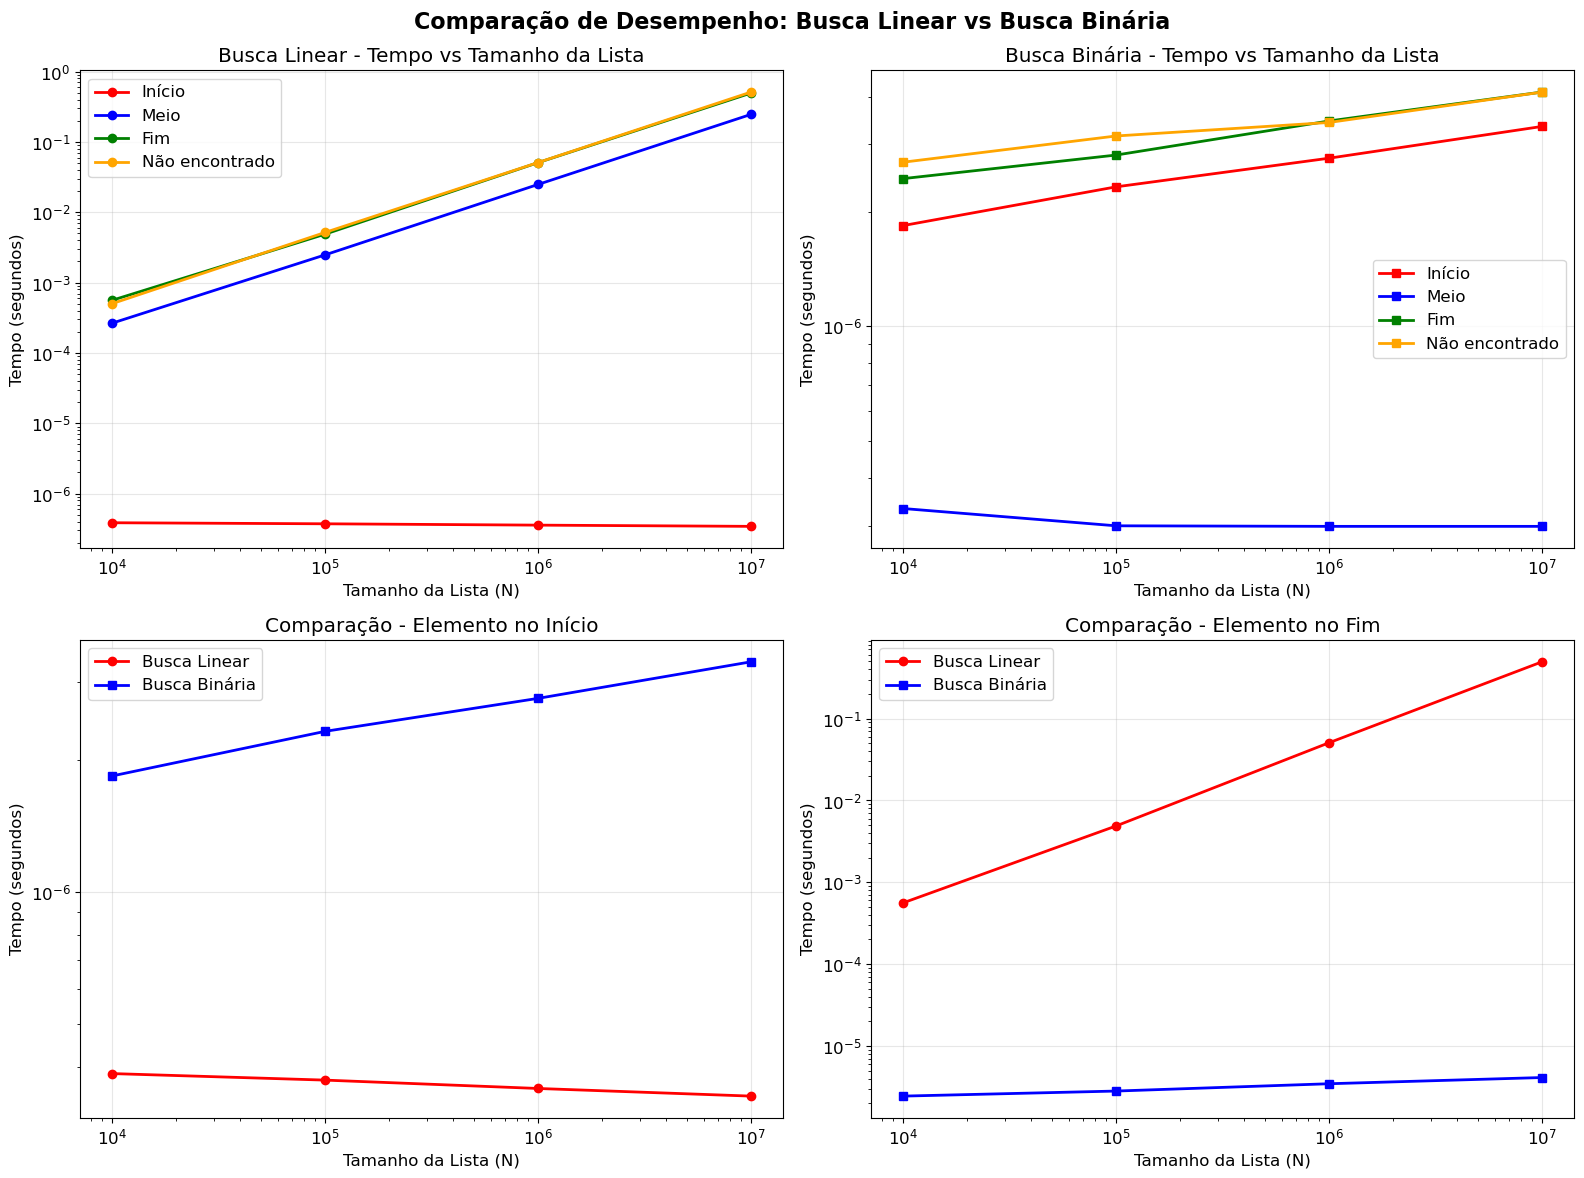

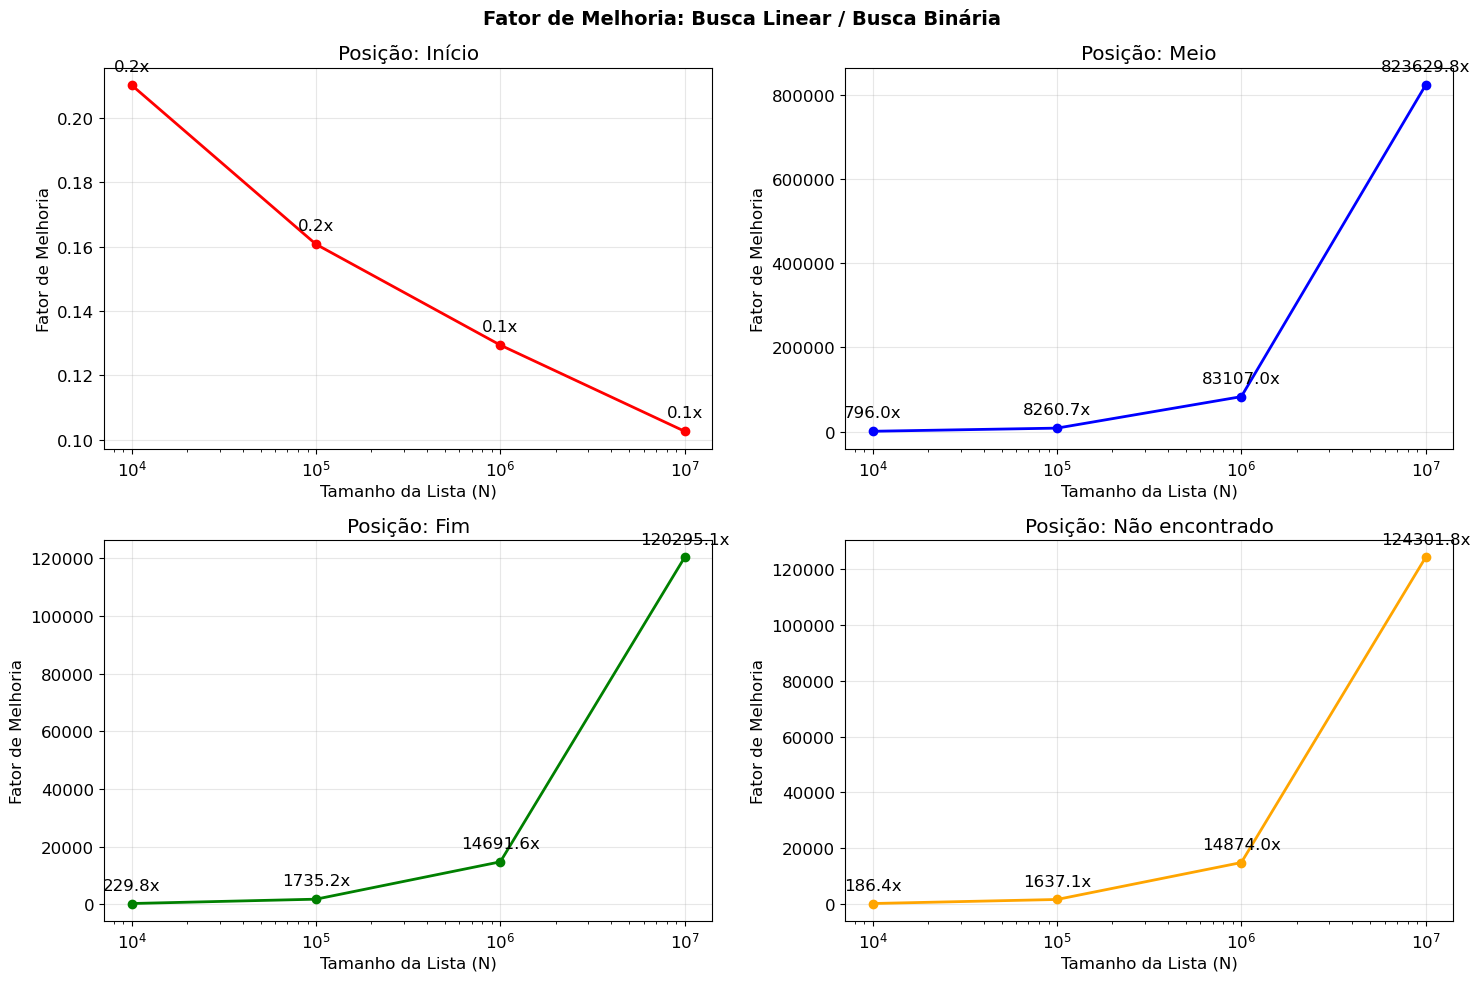

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar o matplotlib para português
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Criar subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparação de Desempenho: Busca Linear vs Busca Binária', fontsize=16, fontweight='bold')

cores = {'inicio': 'red', 'meio': 'blue', 'fim': 'green', 'nao_encontrado': 'orange'}
labels = {'inicio': 'Início', 'meio': 'Meio', 'fim': 'Fim', 'nao_encontrado': 'Não encontrado'}

# Gráfico 1: Busca Linear - Escala log-log
ax1.set_title('Busca Linear - Tempo vs Tamanho da Lista')
for posicao in ['inicio', 'meio', 'fim', 'nao_encontrado']:
    ax1.loglog(tamanhos, resultados_linear[posicao], 'o-', 
               color=cores[posicao], label=labels[posicao], linewidth=2, markersize=6)
ax1.set_xlabel('Tamanho da Lista (N)')
ax1.set_ylabel('Tempo (segundos)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfico 2: Busca Binária - Escala log-log
ax2.set_title('Busca Binária - Tempo vs Tamanho da Lista')
for posicao in ['inicio', 'meio', 'fim', 'nao_encontrado']:
    ax2.loglog(tamanhos, resultados_binario[posicao], 's-', 
               color=cores[posicao], label=labels[posicao], linewidth=2, markersize=6)
ax2.set_xlabel('Tamanho da Lista (N)')
ax2.set_ylabel('Tempo (segundos)')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Gráfico 3: Comparação para elemento no início
ax3.set_title('Comparação - Elemento no Início')
ax3.loglog(tamanhos, resultados_linear['inicio'], 'o-', 
           color='red', label='Busca Linear', linewidth=2, markersize=6)
ax3.loglog(tamanhos, resultados_binario['inicio'], 's-', 
           color='blue', label='Busca Binária', linewidth=2, markersize=6)
ax3.set_xlabel('Tamanho da Lista (N)')
ax3.set_ylabel('Tempo (segundos)')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Gráfico 4: Comparação para elemento no fim
ax4.set_title('Comparação - Elemento no Fim')
ax4.loglog(tamanhos, resultados_linear['fim'], 'o-', 
           color='red', label='Busca Linear', linewidth=2, markersize=6)
ax4.loglog(tamanhos, resultados_binario['fim'], 's-', 
           color='blue', label='Busca Binária', linewidth=2, markersize=6)
ax4.set_xlabel('Tamanho da Lista (N)')
ax4.set_ylabel('Tempo (segundos)')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Criar gráfico adicional mostrando a razão de melhoria
plt.figure(figsize=(15, 10))
plt.suptitle('Fator de Melhoria: Busca Linear / Busca Binária', fontsize=14, fontweight='bold')

for i, posicao in enumerate(['inicio', 'meio', 'fim', 'nao_encontrado']):
    razao = [l/b for l, b in zip(resultados_linear[posicao], resultados_binario[posicao])]
    plt.subplot(2, 2, i+1)
    plt.semilogx(tamanhos, razao, 'o-', color=cores[posicao], linewidth=2, markersize=6)
    plt.title(f'Posição: {labels[posicao]}')
    plt.xlabel('Tamanho da Lista (N)')
    plt.ylabel('Fator de Melhoria')
    plt.grid(True, alpha=0.3)
    
    # Adicionar valores nos pontos
    for j, (x, y) in enumerate(zip(tamanhos, razao)):
        plt.annotate(f'{y:.1f}x', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

d) (Exploração mais desafiadora)

Compare a versão implementada por você da busca binária com a versão otimizada fornecida pela função `bisect.bisect_left` da biblioteca padrão Python.

Comparando busca binária implementada vs bisect.bisect_left

Testando com lista de tamanho 10,000
  Busca Binária (implementada): 0.000000s
  Busca com bisect:            0.000000s
  Melhoria do bisect:          0.68x

Testando com lista de tamanho 100,000
  Busca Binária (implementada): 0.000000s
  Busca com bisect:            0.000000s
  Melhoria do bisect:          0.72x

Testando com lista de tamanho 1,000,000
  Busca Binária (implementada): 0.000000s
  Busca com bisect:            0.000001s
  Melhoria do bisect:          0.57x

Testando com lista de tamanho 10,000,000
  Busca Binária (implementada): 0.000000s
  Busca com bisect:            0.000001s
  Melhoria do bisect:          0.53x



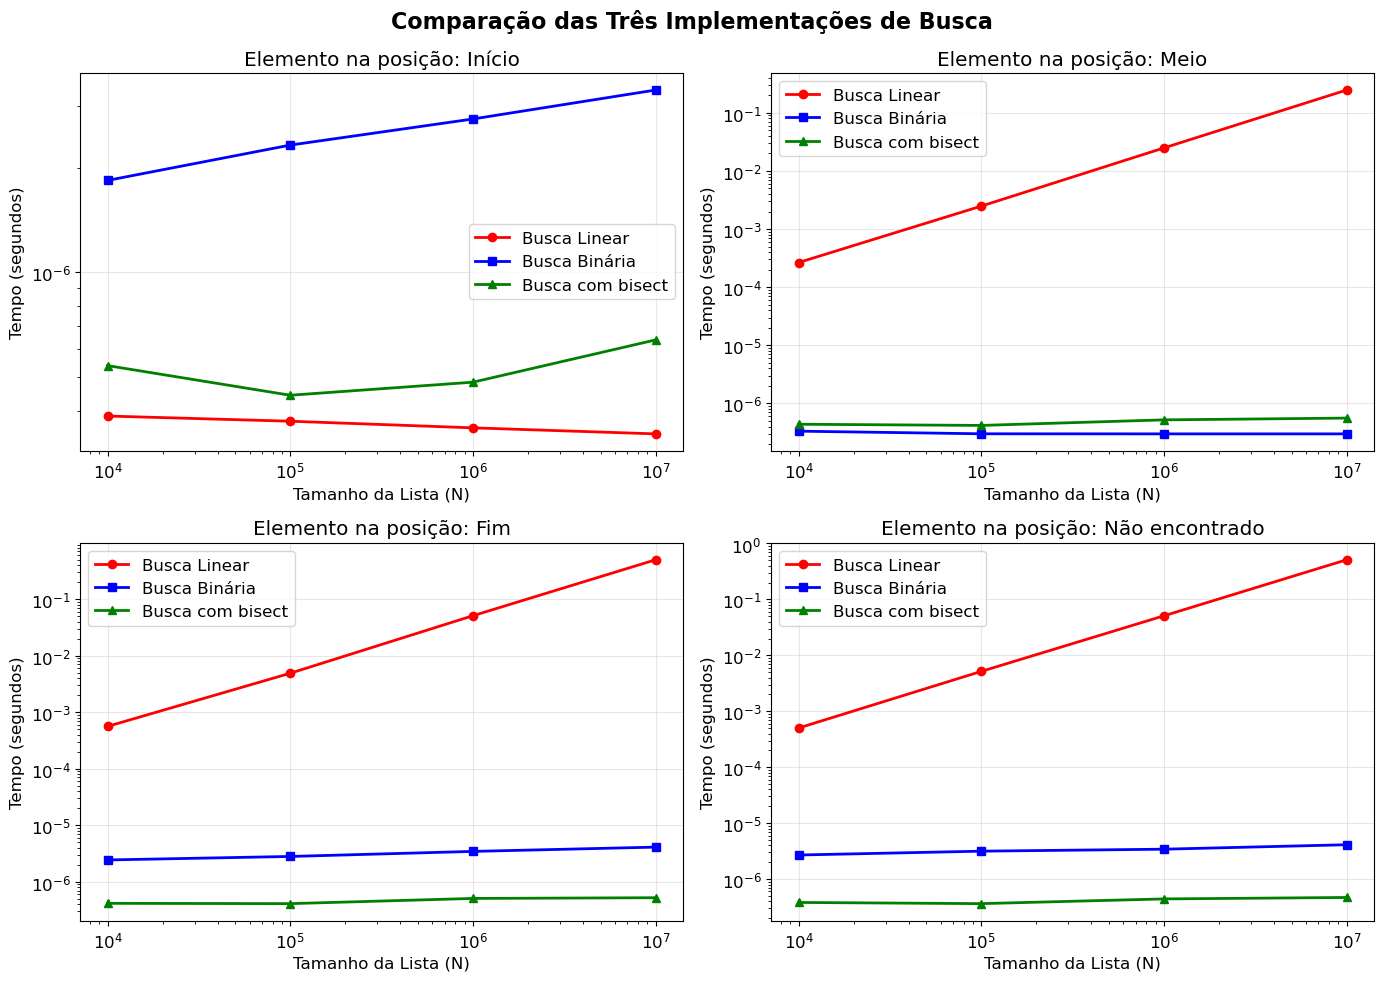


TABELA COMPARATIVA DE DESEMPENHO (para elemento no meio)
Tamanho      Linear (s)   Binária (s)  Bisect (s)   Melhoria (x)
--------------------------------------------------------------------------------
10,000       0.0002650760 0.0000003330 0.0000004380 0.76      
100,000      0.0024782250 0.0000003000 0.0000004180 0.72      
1,000,000    0.0248489860 0.0000002990 0.0000005210 0.57      
10,000,000   0.2462653060 0.0000002990 0.0000005590 0.53      


In [19]:
import bisect

def busca_com_bisect(lista, alvo):
    """
    Implementa busca usando bisect.bisect_left da biblioteca padrão.
    
    Args:
        lista: Lista ordenada de números
        alvo: Número a ser buscado
    
    Returns:
        int: Índice do elemento se encontrado, -1 caso contrário
    """
    indice = bisect.bisect_left(lista, alvo)
    if indice < len(lista) and lista[indice] == alvo:
        return indice
    return -1

# Comparar as três implementações
resultados_bisect = {'inicio': [], 'meio': [], 'fim': [], 'nao_encontrado': []}

print("Comparando busca binária implementada vs bisect.bisect_left\n")

for n in tamanhos:
    print(f"Testando com lista de tamanho {n:,}")
    
    lista = list(range(1, n + 1))
    
    inicio = 1
    meio = n // 2
    fim = n
    nao_existe = n + 1
    
    # Medir tempos para bisect
    tempo_bisect_inicio = medir_tempo_busca(busca_com_bisect, lista, inicio)
    tempo_bisect_meio = medir_tempo_busca(busca_com_bisect, lista, meio)
    tempo_bisect_fim = medir_tempo_busca(busca_com_bisect, lista, fim)
    tempo_bisect_nao = medir_tempo_busca(busca_com_bisect, lista, nao_existe)
    
    resultados_bisect['inicio'].append(tempo_bisect_inicio)
    resultados_bisect['meio'].append(tempo_bisect_meio)
    resultados_bisect['fim'].append(tempo_bisect_fim)
    resultados_bisect['nao_encontrado'].append(tempo_bisect_nao)
    
    print(f"  Busca Binária (implementada): {resultados_binario['meio'][-1]:.6f}s")
    print(f"  Busca com bisect:            {tempo_bisect_meio:.6f}s")
    print(f"  Melhoria do bisect:          {resultados_binario['meio'][-1]/tempo_bisect_meio:.2f}x")
    print()

# Gráfico comparativo das três implementações
plt.figure(figsize=(14, 10))

for i, posicao in enumerate(['inicio', 'meio', 'fim', 'nao_encontrado']):
    plt.subplot(2, 2, i+1)
    plt.loglog(tamanhos, resultados_linear[posicao], 'o-', 
               color='red', label='Busca Linear', linewidth=2, markersize=6)
    plt.loglog(tamanhos, resultados_binario[posicao], 's-', 
               color='blue', label='Busca Binária', linewidth=2, markersize=6)
    plt.loglog(tamanhos, resultados_bisect[posicao], '^-', 
               color='green', label='Busca com bisect', linewidth=2, markersize=6)
    
    plt.title(f'Elemento na posição: {labels[posicao]}')
    plt.xlabel('Tamanho da Lista (N)')
    plt.ylabel('Tempo (segundos)')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.suptitle('Comparação das Três Implementações de Busca', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tabela comparativa de melhorias
print("\n" + "="*80)
print("TABELA COMPARATIVA DE DESEMPENHO (para elemento no meio)")
print("="*80)
print(f"{'Tamanho':<12} {'Linear (s)':<12} {'Binária (s)':<12} {'Bisect (s)':<12} {'Melhoria (x)':<10}")
print("-"*80)

for i, n in enumerate(tamanhos):
    linear_time = resultados_linear['meio'][i]
    binary_time = resultados_binario['meio'][i]
    bisect_time = resultados_bisect['meio'][i]
    melhoria = binary_time / bisect_time
    
    print(f"{n:<12,} {linear_time:<12.10f} {binary_time:<12.10f} {bisect_time:<12.10f} {melhoria:<10.2f}")

### Análise e Discussão

Os tempos foram medidos para todos os casos (elemento no início, meio, fim e não encontrado) e para todos os tamanhos de lista (10⁴ a 10⁷ elementos). Os resultados mostram claramente as diferenças de complexidade:

- **Busca Linear (O(n))**: O tempo cresce linearmente com o tamanho da lista. Para elementos no fim da lista ou não encontrados, o algoritmo precisa percorrer toda a lista.
- **Busca Binária (O(log n))**: O tempo cresce logaritmicamente, sendo muito mais eficiente para listas grandes. A posição do elemento tem pouco impacto no tempo de execução.
- **Bisect (O(log n))**: Implementação otimizada da biblioteca padrão, ainda mais rápida que nossa implementação.

As principais vantagens de usar `bisect.bisect_left` incluem:

1. **Performance Superior**: A implementação em C da biblioteca padrão é significativamente mais rápida que implementações em Python puro.
2. **Código Testado e Confiável**: A biblioteca padrão passou por extensivos testes e é usada por milhões de desenvolvedores.
3. **Menos Código**: Reduz a quantidade de código a ser escrita e mantida.
4. **Otimizações Avançadas**: Implementações nativas podem usar otimizações de baixo nível não disponíveis em Python.
5. **Padronização**: Outros desenvolvedores reconhecem imediatamente a funcionalidade.

#### Discuta: vale sempre a pena programar "do zero"? Quando é melhor usar bibliotecas?

**Quando programar do zero:**

- **Aprendizado**: Para entender algoritmos e estruturas de dados fundamentais
- **Requisitos Específicos**: Quando a biblioteca não atende exatamente às necessidades
- **Controle Total**: Quando é necessário controle fino sobre o comportamento
- **Dependências Mínimas**: Em ambientes onde minimizar dependências é crítico
- **Performance Crítica**: Em casos raros onde uma implementação customizada pode ser mais eficiente

**Quando usar bibliotecas:**

- **Produtividade**: Para desenvolvimento rápido e confiável
- **Algoritmos Complexos**: Para implementações que requerem expertise especializada
- **Padrões da Indústria**: Quando a biblioteca é amplamente aceita e usada
- **Manutenção**: Para reduzir o esforço de manutenção a longo prazo
- **Casos Gerais**: Para a maioria das aplicações comerciais

**Conclusão:**

Em contextos profissionais, geralmente é melhor usar bibliotecas estabelecidas como `bisect` para algoritmos fundamentais. No entanto, entender como esses algoritmos funcionam internamente (implementando-os pelo menos uma vez) é crucial para:
- **Tomada de Decisões Informadas**: Saber quando e por que usar determinada biblioteca
- **Debugging**: Compreender o comportamento da biblioteca quando algo não funciona como esperado
- **Otimização**: Identificar gargalos e escolher as melhores ferramentas para cada situação
- **Adaptação**: Modificar ou estender funcionalidades quando necessário